In [64]:
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam 

In [65]:
n_pts = 500
X, y = datasets.make_circles(n_samples = n_pts, random_state = 123, noise = 0.1, factor = 0.2)


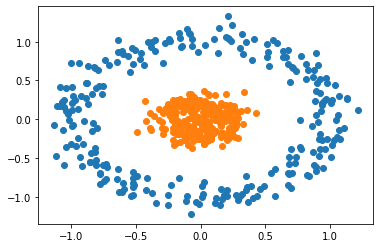

In [66]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [67]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation ='sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(Adam(learning_rate= 0.01), 'binary_crossentropy', metrics = ['accuracy'])



In [68]:
h = model.fit(x=X, y=y, verbose = 1, batch_size=20, epochs=100, shuffle = 'true')

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4000
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5500
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.6900
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.6120
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.4180
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.6300
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.6260
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.6400
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.6700
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.6500
Epoch 11/

Text(0.5, 1.0, 'accuracy')

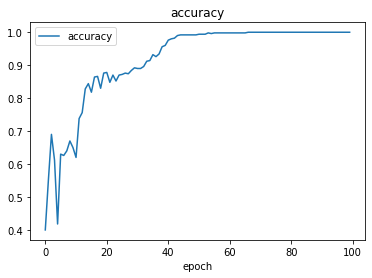

In [69]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

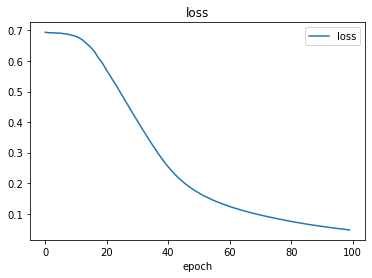

In [70]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [71]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25, 50)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

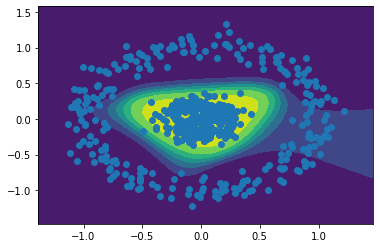

In [72]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prediction is:  [[0.98430365]]


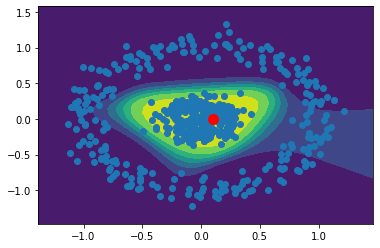

In [74]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0.1
y = 0
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker ="o", markersize=10, color="red")
print("Prediction is: ", prediction)